# Logistic Regression
1.เขียนโปรแกรมสำหรับสร้างแบบจำลอง logistic regression ด้วยวิธี gradient descent สำหรับแก้ปัญหา logic AND, OR และ XOR (สำหรับปัญหา XOR ต้องใช้ interaction feature)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Sigmoid function
$$ g(z) = \frac{1}{1 + e^{-z}}    $$

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# test function
sigmoid(0)

0.5

สมมติฐาน (Hypothesis)
$$ h_θ(x) = g(θ_0x_0 + θ_1x_1 + θ_2x_2) $$

In [3]:
def hypothesis(w, X):
    H = sigmoid(np.dot(X, w))
    return H


# test function
hypothesis(np.array([0, 0, 0]), np.array(
    [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]))

array([0.5, 0.5, 0.5, 0.5])

Cost function
$$ J(θ) = \frac{1}{m} [−y^Tlog(h_θ(x)) − (1 − y)^Tlog(1 − h_θ(x))] $$

In [4]:
def Cost(H, Y):
    cost = -np.sum(Y*np.log(H) + (1-Y)*np.log(1-H))/len(Y)
    return cost


# test function
Cost(np.array([0.5, 0.5, 0.5, 0.5]), np.array([0, 0, 0, 1]))

0.6931471805599453

Gradient
$$ \frac{∂}{∂θ_j}J(θ) = \frac{1}{m}X^T(h_θ(x) − y) $$

Gradient descent
$$ θ_j ≔ θ_j-\frac{a}{m}X^T(h_θ(x) − y) $$

In [5]:
def gradientDescent(x, y, theta, learning_rate, iterations,show):
    cost_history = []
    theta_n = np.copy(theta)
    theta_history = []
    for epoch in range(iterations):
        H = hypothesis(theta_n, x)
        cost = Cost(H, y)
        gradient = np.dot(x.T, (H-y))/len(y)
        theta_n -= learning_rate * gradient
        theta_history.append(list(theta_n))
        cost_history.append(cost)
        if show :
            print(f"Epoch {epoch+1}/{iterations}:  CE: {cost:.10f}")

    return theta_n, cost_history, np.array(theta_history)

# test function
gradientDescent(
    np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]),
    np.array([0, 0, 0, 1]),
    np.array([0, 0, 0], dtype='float64'), 1, 1,True)

Epoch 1/1:  CE: 0.6931471806


(array([-0.25,  0.  ,  0.  ]),
 [0.6931471805599453],
 array([[-0.25,  0.  ,  0.  ]]))

Logic AND data

In [6]:
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_AND = np.array([0, 0, 0, 1])
X_AND = np.insert(X_AND, 0, 1, axis=1)  # include intercept
theta_AND = np.zeros(X_AND.shape[1])
learning_rate = 1
iterations = 200

theta_AND_final, cost_AND_history, theta_AND_history = gradientDescent(
    X_AND, Y_AND, theta_AND, learning_rate, iterations, False)
print("theta_AND_final", theta_AND_final)
print("Resulting cost:", cost_AND_history[-1])
H = hypothesis(theta_AND_final, X_AND)
print(H)

theta_AND_final [-6.5618597   4.24667947  4.24667947]
Resulting cost: 0.08163181842201611
[0.00141126 0.08987352 0.08987352 0.87341527]


Logic OR data

In [7]:
X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_OR = np.array([0, 1, 1, 1])
X_OR = np.insert(X_OR, 0, 1, axis=1) #include intercept
theta_OR = np.zeros(X_OR.shape[1])
learning_rate = 1
iterations = 200

theta_OR_final, cost_OR_history, theta_OR_history = gradientDescent(
    X_OR, Y_OR, theta_OR, learning_rate, iterations,False)
print("theta_OR_final",theta_OR_final)
print("Resulting cost:",cost_OR_history[-1])
H = hypothesis(theta_OR_final, X_OR) 
print(H)

theta_OR_final [-2.18919258  5.3712185   5.3712185 ]
Resulting cost: 0.04715074231979036
[0.10072521 0.96015225 0.96015225 0.99980712]


In [8]:
X_XOR = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
Y_XOR = np.array([0, 1, 1, 0])
X_XOR = np.insert(X_XOR, 0, 1, axis=1)  # include intercept
theta_XOR = np.zeros(X_XOR.shape[1])
learning_rate = 1
iterations = 200

theta_XOR_final, cost_XOR_history, theta_XOR_histXORy = gradientDescent(
    X_XOR, Y_XOR, theta_XOR, learning_rate, iterations, True)
print("theta_XOR_final", theta_XOR_final)
print("Resulting cost:", cost_XOR_history[-1])
H = hypothesis(theta_XOR_final, X_XOR)
print(H)

Epoch 1/200:  CE: 0.6931471806
Epoch 2/200:  CE: 0.6780101442
Epoch 3/200:  CE: 0.6643825375
Epoch 4/200:  CE: 0.6517443843
Epoch 5/200:  CE: 0.6398747162
Epoch 6/200:  CE: 0.6286561808
Epoch 7/200:  CE: 0.6180104342
Epoch 8/200:  CE: 0.6078765525
Epoch 9/200:  CE: 0.5982034820
Epoch 10/200:  CE: 0.5889470916
Epoch 11/200:  CE: 0.5800687703
Epoch 12/200:  CE: 0.5715345734
Epoch 13/200:  CE: 0.5633145925
Epoch 14/200:  CE: 0.5553824391
Epoch 15/200:  CE: 0.5477148022
Epoch 16/200:  CE: 0.5402910635
Epoch 17/200:  CE: 0.5330929614
Epoch 18/200:  CE: 0.5261042963
Epoch 19/200:  CE: 0.5193106741
Epoch 20/200:  CE: 0.5126992805
Epoch 21/200:  CE: 0.5062586856
Epoch 22/200:  CE: 0.4999786724
Epoch 23/200:  CE: 0.4938500870
Epoch 24/200:  CE: 0.4878647082
Epoch 25/200:  CE: 0.4820151341
Epoch 26/200:  CE: 0.4762946822
Epoch 27/200:  CE: 0.4706973030
Epoch 28/200:  CE: 0.4652175041
Epoch 29/200:  CE: 0.4598502843
Epoch 30/200:  CE: 0.4545910754
Epoch 31/200:  CE: 0.4494356921
Epoch 32/200:  CE

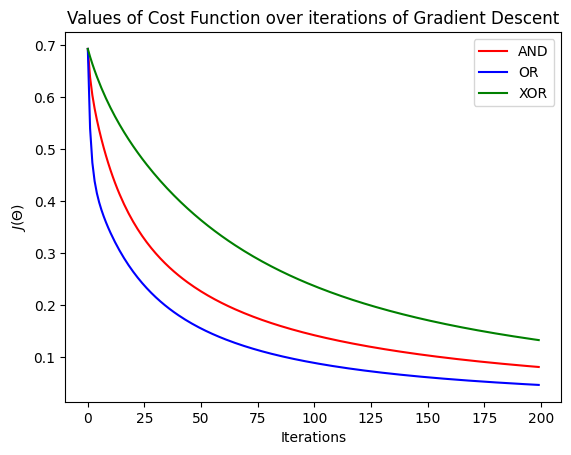

In [9]:
plt.plot(cost_AND_history,color='red',label='AND')
plt.plot(cost_OR_history,color='b',label='OR')
plt.plot(cost_XOR_history,color='g',label='XOR')
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.legend()
plt.title("Values of Cost Function over iterations of Gradient Descent");

[0 1]
[1.54517423 0.54517423]


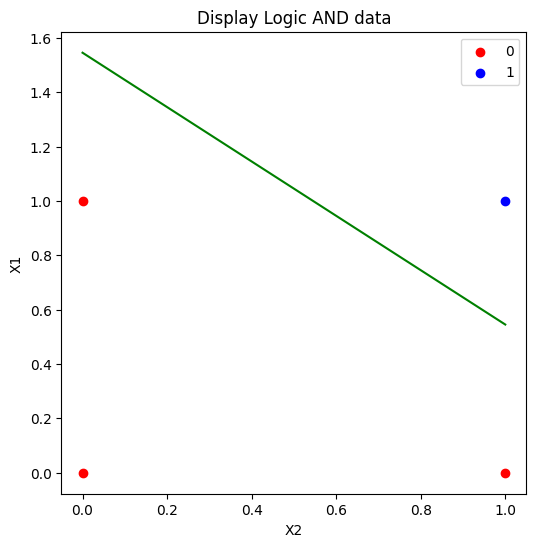

In [13]:
x_boundary = np.array([np.min(X_AND[:, 2]), np.max(X_AND[:, 2])])
y_boundary = -( theta_AND_final[0] + theta_AND_final[2] * x_boundary) / theta_AND_final[1]

print(x_boundary)
print(y_boundary)

plt.figure(figsize=(6, 6))
plt.scatter(X_AND[:,1][0:3], X_AND[:,2][0:3], color='red', label='0')
plt.scatter(X_AND[:,1][-1], X_AND[:,2][-1], color='b', label='1')
plt.plot(x_boundary,y_boundary, 'g')
plt.xlabel('X2')
plt.ylabel('X1')
plt.title('Display Logic AND data')
plt.legend()
plt.show()

[0 1]
[ 0.40757839 -0.59242161]


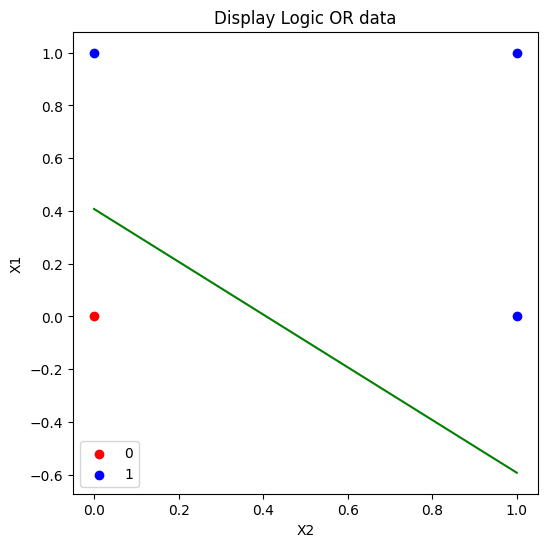

In [11]:
x_boundary = np.array([np.min(X_OR[:, 2]), np.max(X_OR[:, 2])])
y_boundary = -(theta_OR_final[0] + theta_OR_final[2] * x_boundary) / theta_OR_final[1]

print(x_boundary)
print(y_boundary)

plt.figure(figsize=(6, 6))
plt.scatter(X_OR[:,1][0:1], X_OR[:,2][0:1], color='red', label='0')
plt.scatter(X_OR[:,1][1:4], X_OR[:,2][1:4], color='b', label='1')
plt.plot(x_boundary,y_boundary, 'g')
plt.xlabel('X2')
plt.ylabel('X1')
plt.title('Display Logic OR data')
plt.legend()
plt.show()